# Numerical solutions to the Laplace Equation on a Square

This jupyter notebook numerically computes the potential profile in two dimensions on a square with arbitrary boundary conditions, as dictated by the Laplace equation:

$$ \nabla^2 V(x,y) = 0, $$

subject to boundary conditions:

$$ V(x, 0) = v_1(x) $$
$$ V(x, L) = v_2(x) $$
$$ V(0, y) = v_3(y) $$
$$ V(L, y) = v_4(y). $$

The general solution is given as a Fourier expansion:

$$ V(x,y) = \sum_{n=0}^\infty \Bigg\{\left[A_{n} \sinh(\frac{n\pi}{L} (y-L)) +
      B_{n} \sinh(\frac{n\pi}{L} y)\right] \sin(\frac{n\pi}{L}x)
      \\ \hspace{5cm} + \left[C_{n} \sinh(\frac{n\pi}{L} (x - L)) +
      D_{n} \sinh(\frac{n\pi}{L} x) \right]\sin(\frac{n\pi}{L}y)  \Bigg\} $$
      
where the coefficents are determined by:
$$ A_{n} = \frac{2/L}{\sinh(-n\pi)}  \int_0^L dx v_1(x) \sin(\frac{n\pi}{L}x) $$
$$ B_{n} = \frac{2/L}{\sinh(n\pi)}  \int_0^L dx v_2(x) \sin(\frac{n\pi}{L}x) $$
$$ C_{n} = \frac{2/L}{\sinh(-n\pi)}  \int_0^L dy v_3(y) \sin(\frac{n\pi}{L}y) $$
$$ D_{n} = \frac{2/L}{\sinh(n\pi)}  \int_0^L dy v_4(y) \sin(\frac{n\pi}{L}y).$$

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pi = np.pi

In [171]:
# Functions to calculate the potential profile for individual boundary condition cases
# X, Y = meshgrid-type 2D arrays
# L = the length of the ROI (assuming square shape)
# x = vector of points 0 < x < L
# vi = vector containing boundary condition profile sampled at x
# depth = number of Fourier coefficients calculated

def calcSquare1(X, Y, L, x, v1, depth):
    # For V(x,0) = v1(x)
    V = np.zeros(X.shape)
    dx = x[1] - x[0]
    for n in (range(depth) + np.ones(depth)):
        An = (2 / L) * np.sum(np.sin(n* pi * x / L) * v1 * dx) / np.sinh(-1 * n * pi)
        f = np.sinh(n * pi * (Y - L) / L)
        g = np.sin(n * pi * X / L)
        V = V + (An * f * g)
    return V
    
def calcSquare2(X, Y, L, x, v2, depth):
    # For V(x,L) = v2(x)
    V = np.zeros(X.shape)
    dx = x[1] - x[0]
    for n in (range(depth) + np.ones(depth)):
        An = (2 / L) * np.sum(np.sin(n* pi * x / L) * v2 * dx) / np.sinh(n * pi)
        f = np.sinh(n * pi * Y / L)
        g = np.sin(n * pi * X / L)
        V = V + (An * f * g)
    return V
    
def calcSquare3(X, Y, L, x, v3, depth):
    # For V(0,y) = v3(y)
    V = np.zeros(X.shape)
    dx = x[1] - x[0]   
    for n in (range(depth) + np.ones(depth)):
        An = (2 / L) * np.sum(np.sin(n* pi * x / L) * v3 * dx) / np.sinh(-1 * n * pi)
        f = np.sinh(n * pi * (X - L) / L)
        g = np.sin(n * pi * Y / L)
        V = V + (An * f * g)
    return V
    
def calcSquare4(X, Y, L, x, v4, depth):
    # For V(L,y) = v4(y)
    V = np.zeros(X.shape)
    dx = x[1] - x[0]
    for n in (range(depth) + np.ones(depth)):
        An = (2 / L) * np.sum(np.sin(n* pi * x / L) * v4 * dx) / np.sinh( n * pi)
        f = np.sinh(n * pi * X / L)
        g = np.sin(n * pi * Y / L)
        V = V + (An * f * g)
    return V

In [172]:
L = 10
mesh = 128
x = np.linspace(0,L, num=mesh)
X = np.outer(x, np.ones(len(x)))
Y = X.T

v1 = np.cos(4 * pi * x / L)
#print(v1)

V1 = calcSquare1(X, Y, L, x, v1, 100)
V2 = calcSquare2(X, Y, L, x, v1, 100)
V3 = calcSquare3(X, Y, L, x, v1, 100)
V4 = calcSquare4(X, Y, L, x, v1, 100)

V = V1 + V2 + V3 + V4

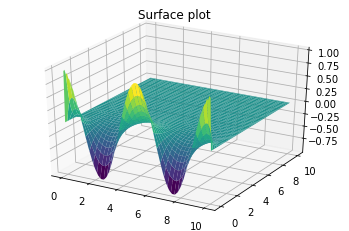

In [173]:
# Plots V1 profile

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, V1, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

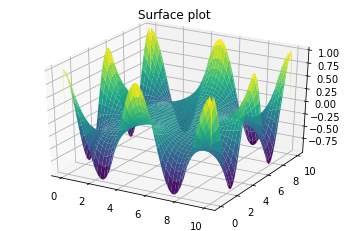

In [174]:
# Plot of total potential profile

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, V, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

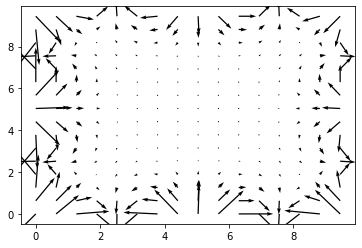

In [175]:
# Plotting electric field

Ex, Ey = np.gradient(V)
Ex = -1 * Ex[0:mesh:step, 0:mesh:step]
Ey = -1 * Ey[0:mesh:step, 0:mesh:step]

Rx = X[0:mesh:step, 0:mesh:step]
Ry = Y[0:mesh:step, 0:mesh:step]

step = 8

plt.quiver(Rx, Ry, Ex, Ey)


# More practical potential profiles

The potential profiles may be generated in practice with a discrete array of electrodes. This might be represented as a square pulse in the boundary condition.

In [197]:
def rectPuls(x, width, center):
    x = x - center
    y = np.heaviside((x + width/2), 0.5) - np.heaviside((x - width/2), 0.5)
    return y

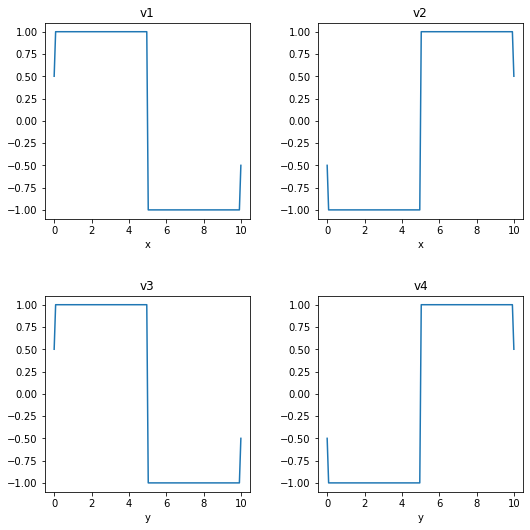

In [213]:
v1 = rectPuls(x, 5, 2.5) - rectPuls(x, 5, 7.5)

v2 = - rectPuls(x, 5, 2.5) + rectPuls(x, 5, 7.5)

v3 = rectPuls(x, 5, 2.5) - rectPuls(x, 5, 7.5)

v4 = -rectPuls(x, 5, 2.5) + rectPuls(x, 5, 7.5)


plt.figure(figsize=(8, 8))

plt.subplot(221)
plt.plot(x, v1)
plt.xlabel('x')
plt.title('v1')
plt.subplot(222)
plt.plot(x, v2)
plt.xlabel('x')
plt.title('v2')
plt.subplot(223)
plt.plot(x, v3)
plt.xlabel('y')
plt.title('v3')
plt.subplot(224)
plt.plot(x, v4)
plt.xlabel('y')
plt.title('v4')
plt.tight_layout(pad=3.0)
plt.show()

In [214]:
L = 10
mesh = 128
x = np.linspace(0,L, num=mesh)
X = np.outer(x, np.ones(len(x)))
Y = X.T

V1 = calcSquare1(X, Y, L, x, v1, 100)
V2 = calcSquare2(X, Y, L, x, v2, 100)
V3 = calcSquare3(X, Y, L, x, v3, 100)
V4 = calcSquare4(X, Y, L, x, v4, 100)

V = V1 + V2 + V3 + V4

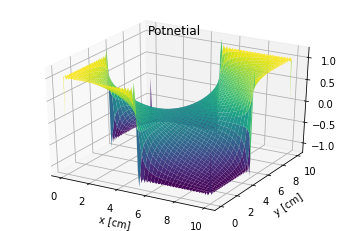

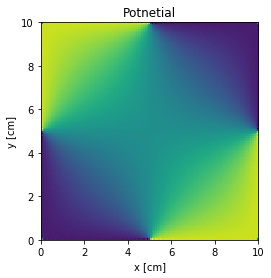

In [225]:
fig1 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, V, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Potnetial')
plt.show()

fig2 = plt.figure()
plt.imshow(V, interpolation='none', extent=[0,10,0,10])
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Potnetial')
plt.show()

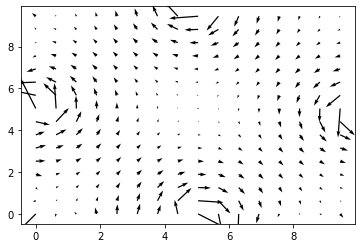

In [216]:
Ex, Ey = np.gradient(V)
Ex = -1 * Ex[0:mesh:step, 0:mesh:step]
Ey = -1 * Ey[0:mesh:step, 0:mesh:step]

Rx = X[0:mesh:step, 0:mesh:step]
Ry = Y[0:mesh:step, 0:mesh:step]

step = 8

plt.quiver(Rx, Ry, Ex, Ey)